In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

In [2]:
df = pd.read_excel("Data.xlsx", sheet_name = "Rahi bhai")
df.head()

,Unnamed: 0,Depth,Phi,C,spt,N60
0,BH1,22.5,38.0,6.3452,50,30.0
1,BH2,28.5,37.5,3.8679,50,30.0
2,BH3,28.5,38.0,2.2164,50,30.0
3,BH4,30.0,38.0,7.9967,50,30.0
4,NaN,16.5,33.0,4.6936,50,30.0


In [3]:
df.columns = ["Borehole", "Depth", "Phi", "C", "SPT", "N60"]
df.head()

,Borehole,Depth,Phi,C,SPT,N60
0,BH1,22.5,38.0,6.3452,50,30.0
1,BH2,28.5,37.5,3.8679,50,30.0
2,BH3,28.5,38.0,2.2164,50,30.0
3,BH4,30.0,38.0,7.9967,50,30.0
4,NaN,16.5,33.0,4.6936,50,30.0


In [4]:
df.drop("Borehole",axis=1,inplace= True)

In [5]:
#df["SPT_N60"] = 0.60* df["SPT"]

In [4]:
df.head()

,Borehole,Depth,Phi,C,SPT,N60
0,BH1,22.5,38.0,6.3452,50,30.0
1,BH2,28.5,37.5,3.8679,50,30.0
2,BH3,28.5,38.0,2.2164,50,30.0
3,BH4,30.0,38.0,7.9967,50,30.0
4,NaN,16.5,33.0,4.6936,50,30.0


In [5]:
df = df.drop(["C", "SPT"], axis = 1)

In [6]:
df.corr()

,Depth,Phi,N60
Depth,1.000000,0.744358,0.782704
Phi,0.744358,1.000000,0.917124
N60,0.782704,0.917124,1.000000


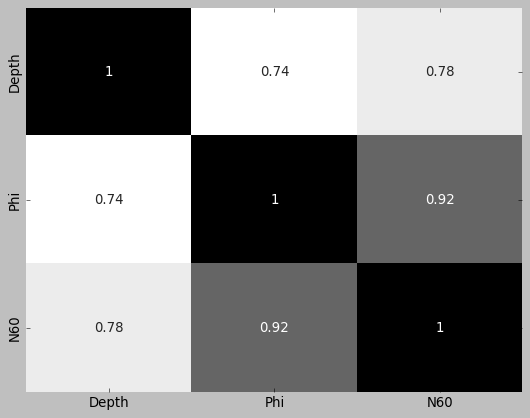

In [7]:
image = sns.heatmap(df.corr(), annot = True, cbar = False, cmap = "Greys")
#image.figure.savefig("heatmap.png", dpi=600, transparent=True) 

In [8]:
#df[df["N60"] < 3]

In [9]:
for_print = df.describe().transpose()
#for_print.to_excel("describe.xlsx")

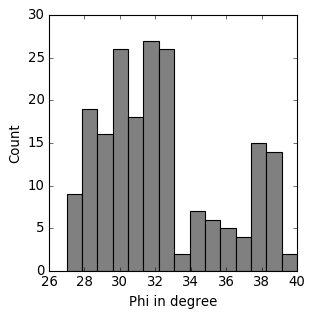

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)

plt.hist(df["Phi"],color = "gray", bins = 15 )
fig.patch.set_facecolor("White")
ax.set(ylabel = "Count", xlabel = "Phi in degree")
fig.savefig("Phi_hist.jpg", dpi = 600, transparent=True)

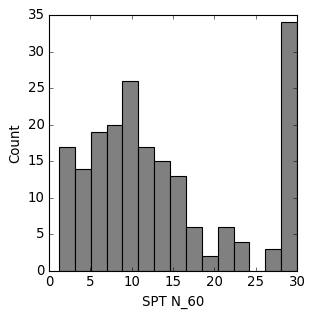

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
plt.hist(df["N60"],color = "gray", bins = 15 )
fig.patch.set_facecolor("White")
ax.set(ylabel = "Count", xlabel = "SPT N_60")
fig.savefig("SPT N60_hist.jpg", dpi = 600, transparent=True)

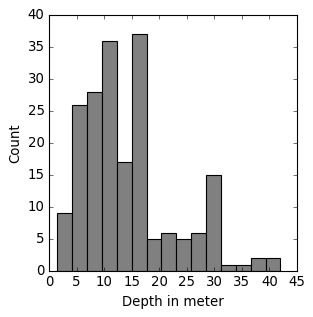

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)

plt.hist(df["Depth"],color = "gray", bins = 15 )
fig.patch.set_facecolor("White")
ax.set(ylabel = "Count", xlabel = "Depth in meter")
fig.savefig("Depth_hist.jpg", dpi = 600, transparent=True)

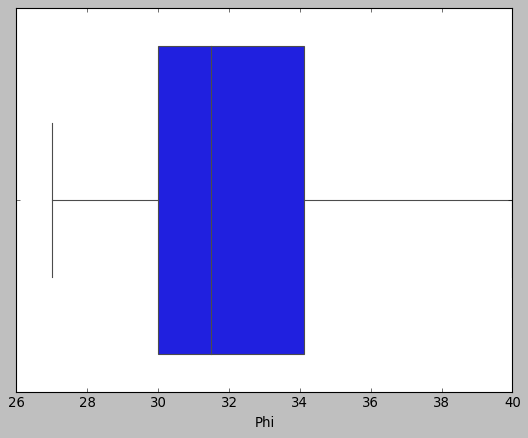

In [13]:
sns.boxplot(df["Phi"])

In [14]:
df.isnull().sum()

Borehole    26
Depth        0
Phi          0
N60          0
dtype: int64

In [15]:
X = df.drop(columns = "Phi", axis = 1)
y = df["Phi"]

In [16]:
#corr_print = df.drop(["N60", "C"], axis = 1).corr()
#corr_print.to_excel("Corr.xlsx")

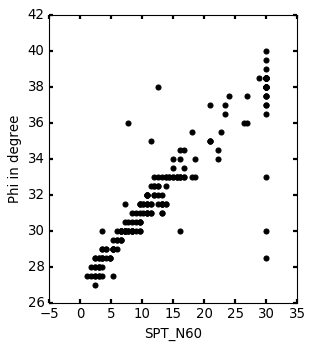

In [18]:
fig, ax = plt.subplots(figsize = (4,4.5))
#fig.set_size_inches(3.5,3)

ax.scatter(df["N60"], df["Phi"], c = "k")
ax.set(ylabel = "Phi in degree", xlabel = "SPT_N60")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
#fig.savefig("Phi vs SPT N60.jpg", dpi = 600, transparent=True)

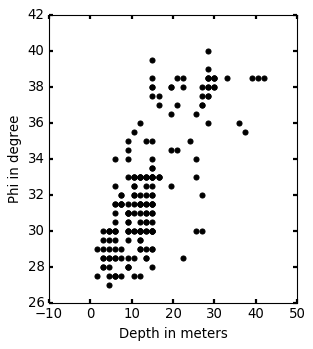

In [19]:
mpl.style.use('classic')
fig, ax = plt.subplots()
fig.set_size_inches(4,4.5)

ax.scatter(df["Depth"], df["Phi"], c = "k")
ax.set(ylabel = "Phi in degree", xlabel = "Depth in meters")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
mpl.rc('xtick', labelsize=10)     
mpl.rc('ytick', labelsize=10)
plt.rcParams.update({'font.size': 10})
#fig.savefig("Phi vs Depth.jpg", dpi = 600, transparent=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [21]:
lr = LinearRegression()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [23]:
y_train.shape

(137,)

In [42]:
#y_test [y_test >= 35]

In [43]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = lr.predict(X_test)

In [45]:
lr.score(X_test, y_test)

0.9096009294867217

In [106]:
lr.coef_

array([0.02619694, 0.31777237])

In [107]:
lr.intercept_

27.519137499219774

In [108]:
r2_score(y_test, y_pred)

0.9096009294867216

In [109]:
rmse = (MSE(y_test, y_pred))**(1/2)
rmse

1.041588070173701

In [121]:
X_test.to_excel("test.xlsx")

In [123]:
y_test.to_excel("test1.xlsx")

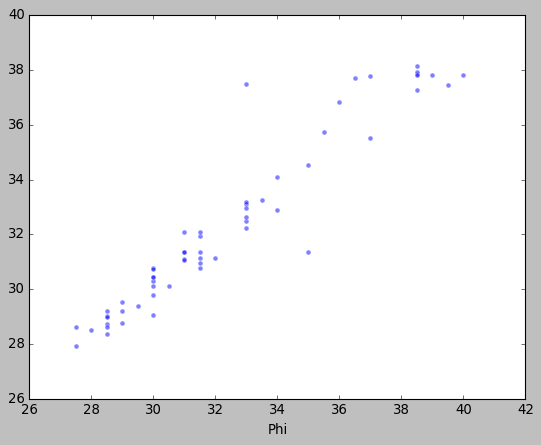

In [87]:
sns.scatterplot(y_test, y_pred, alpha = 0.5)

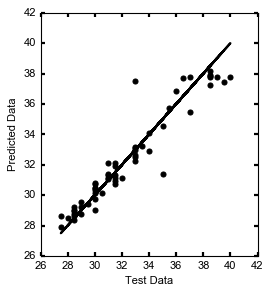

In [51]:
from matplotlib import rc
mpl.rcParams['font.size'] = 10
rc('font',**{'family':'sans-serif','sans-serif':['Arial']}) 
fig, ax = plt.subplots()
fig.set_size_inches(3.5,3.8)

ax.scatter(y_test, y_pred, c = "k")
plt.plot(y_test, y_test, c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Data", xlabel = "Test Data")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
fig.savefig("Linear Regression.jpg", dpi = 600, transparent=True)

In [32]:
lr.coef_

array([0.00084255, 0.33849092])

In [33]:
lr.intercept_

27.621989146075997

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [35]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf.score(X_test,y_test)

0.8589556802491117

In [36]:
rmse = (MSE(y_test,y_pred_rf))**(1/2)
rmse

1.2363552885515896

In [37]:
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = {
'n_estimators': [100, 200, 300, 400, 500],
'max_depth': [2, 4, 6, 8],
'min_samples_leaf': [0.1, 0.2,2,5,10],
'max_features': ['log2', 'sqrt']
}
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
param_grid=params_rf,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

In [38]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [39]:
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 300}


In [40]:
# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred_rf = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred_rf)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 1.22


In [41]:
r2_score(y_test,y_pred_rf)

0.8635275889634216

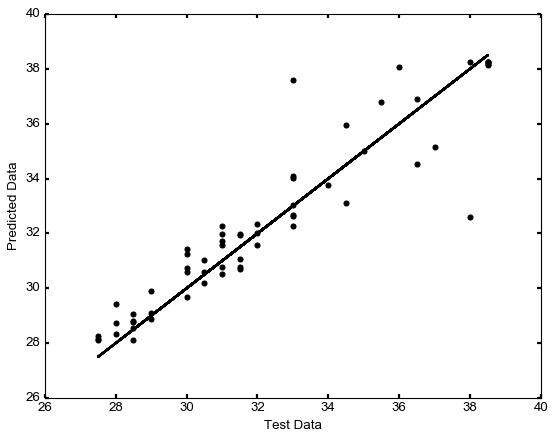

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf, c = "k")
plt.plot(y_test, y_test, c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Data", xlabel = "Test Data")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
#fig.savefig("Random Forest.jpg", dpi = 600, transparent=True)

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

In [44]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
r2_score(y_test, y_pred_gb)

0.8586669758613252

In [45]:
rmse = (MSE(y_test, y_pred_gb))**(1/2)
rmse

1.2376199928933822

In [46]:
gb.score(X_test, y_test)

0.8586669758613253

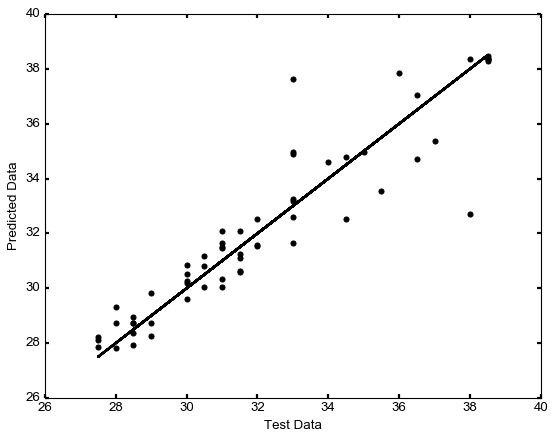

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_gb, c = "k")
plt.plot(y_test, y_test, c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Data", xlabel = "Test Data")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
#fig.savefig("Gradient Boosting.jpg", dpi = 600, transparent=True)

In [49]:
X_print_train = X_train
X_print_test = X_test

## ANN

In [53]:
X_train = X_train.values

In [54]:
X_test = X_test.values

In [55]:
y_train = y_train.values

In [56]:
y_test = y_test.values

In [57]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [62]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [63]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=800,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/800
5/5 [==============================] - 0s 30ms/step - loss: 831.7950 - val_loss: 804.4915
Epoch 2/800
5/5 [==============================] - 0s 6ms/step - loss: 792.1007 - val_loss: 764.0947
Epoch 3/800
5/5 [==============================] - 0s 6ms/step - loss: 753.8448 - val_loss: 723.5686
Epoch 4/800
5/5 [==============================] - 0s 6ms/step - loss: 715.1977 - val_loss: 683.2328
Epoch 5/800
5/5 [==============================] - 0s 6ms/step - loss: 676.1836 - val_loss: 642.8561
Epoch 6/800
5/5 [==============================] - 0s 8ms/step - loss: 636.8336 - val_loss: 601.8779
Epoch 7/800
5/5 [==============================] - 0s 6ms/step - loss: 596.2919 - val_loss: 560.8419
Epoch 8/800
5/5 [==============================] - 0s 10ms/step - loss: 556.1555 - val_loss: 519.2109
Epoch 9/800
5/5 [==============================] - 0s 8ms/step - loss: 514.8473 - val_loss: 477.2806
Epoch 10/800
5/5 [==============================] - ETA: 0s - loss: 476.613 - 0s 9ms/step

Epoch 81/800
5/5 [==============================] - 0s 6ms/step - loss: 128.9804 - val_loss: 137.5432
Epoch 82/800
5/5 [==============================] - 0s 5ms/step - loss: 127.9851 - val_loss: 136.9648
Epoch 83/800
5/5 [==============================] - 0s 6ms/step - loss: 127.7150 - val_loss: 134.6295
Epoch 84/800
5/5 [==============================] - 0s 8ms/step - loss: 126.4675 - val_loss: 133.5115
Epoch 85/800
5/5 [==============================] - 0s 6ms/step - loss: 125.7928 - val_loss: 132.2115
Epoch 86/800
5/5 [==============================] - 0s 6ms/step - loss: 125.3279 - val_loss: 131.3960
Epoch 87/800
5/5 [==============================] - 0s 6ms/step - loss: 124.4321 - val_loss: 130.9488
Epoch 88/800
5/5 [==============================] - 0s 6ms/step - loss: 124.1448 - val_loss: 131.2327
Epoch 89/800
5/5 [==============================] - 0s 6ms/step - loss: 122.6113 - val_loss: 130.1448
Epoch 90/800
5/5 [==============================] - 0s 6ms/step - loss: 122.5216 -

5/5 [==============================] - 0s 6ms/step - loss: 60.5551 - val_loss: 60.4912
Epoch 162/800
5/5 [==============================] - 0s 7ms/step - loss: 60.4022 - val_loss: 59.5621
Epoch 163/800
5/5 [==============================] - 0s 4ms/step - loss: 59.0026 - val_loss: 58.6845
Epoch 164/800
5/5 [==============================] - 0s 8ms/step - loss: 58.1086 - val_loss: 58.0446
Epoch 165/800
5/5 [==============================] - 0s 6ms/step - loss: 57.7593 - val_loss: 57.7548
Epoch 166/800
5/5 [==============================] - 0s 6ms/step - loss: 56.8905 - val_loss: 56.4951
Epoch 167/800
5/5 [==============================] - 0s 8ms/step - loss: 55.9189 - val_loss: 55.4621
Epoch 168/800
5/5 [==============================] - 0s 6ms/step - loss: 55.1457 - val_loss: 54.6368
Epoch 169/800
5/5 [==============================] - 0s 6ms/step - loss: 54.2567 - val_loss: 53.9628
Epoch 170/800
5/5 [==============================] - 0s 4ms/step - loss: 53.8736 - val_loss: 53.3184
Epoc

5/5 [==============================] - 0s 6ms/step - loss: 9.7825 - val_loss: 7.7523
Epoch 243/800
5/5 [==============================] - 0s 6ms/step - loss: 9.4717 - val_loss: 7.4090
Epoch 244/800
5/5 [==============================] - 0s 6ms/step - loss: 9.2210 - val_loss: 7.1454
Epoch 245/800
5/5 [==============================] - 0s 6ms/step - loss: 9.1153 - val_loss: 6.9581
Epoch 246/800
5/5 [==============================] - 0s 6ms/step - loss: 8.7377 - val_loss: 6.7122
Epoch 247/800
5/5 [==============================] - 0s 6ms/step - loss: 8.6444 - val_loss: 6.7425
Epoch 248/800
5/5 [==============================] - 0s 6ms/step - loss: 8.6055 - val_loss: 6.2042
Epoch 249/800
5/5 [==============================] - 0s 8ms/step - loss: 7.9656 - val_loss: 6.2945
Epoch 250/800
5/5 [==============================] - 0s 6ms/step - loss: 8.2146 - val_loss: 6.2469
Epoch 251/800
5/5 [==============================] - 0s 6ms/step - loss: 7.7675 - val_loss: 5.5807
Epoch 252/800
5/5 [=====

Epoch 406/800
5/5 [==============================] - 0s 6ms/step - loss: 2.2669 - val_loss: 1.0778
Epoch 407/800
5/5 [==============================] - 0s 8ms/step - loss: 2.2841 - val_loss: 1.0906
Epoch 408/800
5/5 [==============================] - 0s 6ms/step - loss: 2.3224 - val_loss: 1.1280
Epoch 409/800
5/5 [==============================] - 0s 6ms/step - loss: 2.2567 - val_loss: 1.1409
Epoch 410/800
5/5 [==============================] - 0s 6ms/step - loss: 2.2548 - val_loss: 1.0746
Epoch 411/800
5/5 [==============================] - 0s 6ms/step - loss: 2.3630 - val_loss: 1.0763
Epoch 412/800
5/5 [==============================] - 0s 7ms/step - loss: 2.3110 - val_loss: 1.2076
Epoch 413/800
5/5 [==============================] - 0s 6ms/step - loss: 2.2732 - val_loss: 1.0886
Epoch 414/800
5/5 [==============================] - 0s 6ms/step - loss: 2.3506 - val_loss: 1.0677
Epoch 415/800
5/5 [==============================] - 0s 6ms/step - loss: 2.3640 - val_loss: 1.2166
Epoch 416/

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,831.794983,804.491455
1,792.100708,764.094727
2,753.844849,723.568604
3,715.197693,683.232788
4,676.183594,642.856079
...,...,...
459,2.253397,1.131531
460,2.250277,1.222903
461,2.329633,1.194978
462,2.194115,1.078587


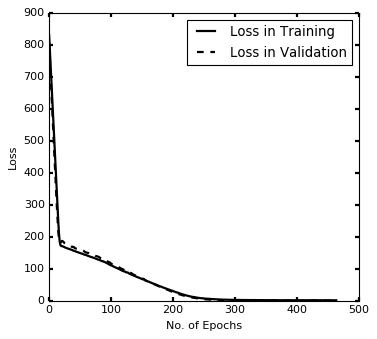

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(5,4.5)
mpl.rcParams['font.size'] = 10

plt.plot(model_loss["loss"], "k-", label = "Loss in Training", linewidth = 2)
plt.plot(model_loss["val_loss"], "k--", label = "Loss in Validation",linewidth = 2)
ax.set(ylabel = "Loss", xlabel = "No. of Epochs")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
ax.legend()
#plt.savefig("Model Validation.png",dpi=600, Transperant = True)

In [86]:
predictions = model.predict(X_test)

In [87]:
np.sqrt(MSE(y_test, predictions))

1.3661290977399043

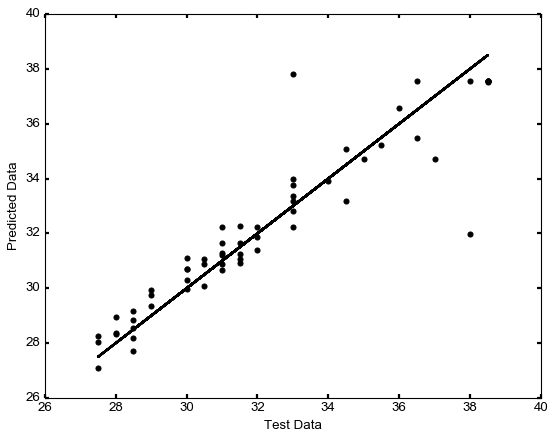

In [213]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, c = "k")
plt.plot(y_test, y_test, c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Data", xlabel = "Test Data")
fig.patch.set_facecolor("White")
ax.tick_params(length = 4, width = 2)
plt.savefig("ANN.png",dpi=600, Transperant = True)

In [210]:
r2_score(y_test, predictions)

0.861796983115156

In [88]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [89]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=800,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/800
5/5 [==============================] - 0s 16ms/step - loss: 1502.5389 - val_loss: 1436.8572
Epoch 2/800
5/5 [==============================] - 0s 6ms/step - loss: 1429.5669 - val_loss: 1371.4954
Epoch 3/800
5/5 [==============================] - 0s 9ms/step - loss: 1364.8030 - val_loss: 1311.4185
Epoch 4/800
5/5 [==============================] - 0s 7ms/step - loss: 1303.4526 - val_loss: 1255.4388
Epoch 5/800
5/5 [==============================] - 0s 6ms/step - loss: 1249.9087 - val_loss: 1203.0353
Epoch 6/800
5/5 [==============================] - 0s 7ms/step - loss: 1196.2972 - val_loss: 1155.1172
Epoch 7/800
5/5 [==============================] - 0s 7ms/step - loss: 1148.6267 - val_loss: 1109.5781
Epoch 8/800
5/5 [==============================] - 0s 7ms/step - loss: 1103.6396 - val_loss: 1066.7582
Epoch 9/800
5/5 [==============================] - 0s 10ms/step - loss: 1061.0021 - val_loss: 1031.0248
Epoch 10/800
5/5 [==============================] - 0s 6ms/step - loss:

Epoch 81/800
5/5 [==============================] - 0s 6ms/step - loss: 143.2543 - val_loss: 138.6257
Epoch 82/800
5/5 [==============================] - 0s 6ms/step - loss: 142.4663 - val_loss: 137.8557
Epoch 83/800
5/5 [==============================] - 0s 6ms/step - loss: 141.5706 - val_loss: 137.1479
Epoch 84/800
5/5 [==============================] - 0s 6ms/step - loss: 140.8631 - val_loss: 136.3891
Epoch 85/800
5/5 [==============================] - 0s 10ms/step - loss: 140.1752 - val_loss: 135.6992
Epoch 86/800
5/5 [==============================] - 0s 9ms/step - loss: 139.5997 - val_loss: 135.0351
Epoch 87/800
5/5 [==============================] - 0s 7ms/step - loss: 138.7386 - val_loss: 134.2463
Epoch 88/800
5/5 [==============================] - 0s 8ms/step - loss: 137.9054 - val_loss: 133.4832
Epoch 89/800
5/5 [==============================] - 0s 7ms/step - loss: 137.1337 - val_loss: 132.6935
Epoch 90/800
5/5 [==============================] - 0s 9ms/step - loss: 136.4100 

Epoch 161/800
5/5 [==============================] - 0s 9ms/step - loss: 91.8587 - val_loss: 87.3487
Epoch 162/800
5/5 [==============================] - 0s 8ms/step - loss: 91.1680 - val_loss: 86.8636
Epoch 163/800
5/5 [==============================] - 0s 9ms/step - loss: 90.7383 - val_loss: 86.4332
Epoch 164/800
5/5 [==============================] - 0s 8ms/step - loss: 90.2212 - val_loss: 85.7597
Epoch 165/800
5/5 [==============================] - 0s 7ms/step - loss: 89.6005 - val_loss: 85.2035
Epoch 166/800
5/5 [==============================] - 0s 9ms/step - loss: 89.1910 - val_loss: 84.7742
Epoch 167/800
5/5 [==============================] - 0s 7ms/step - loss: 88.4937 - val_loss: 83.9966
Epoch 168/800
5/5 [==============================] - 0s 8ms/step - loss: 87.5825 - val_loss: 82.8441
Epoch 169/800
5/5 [==============================] - 0s 9ms/step - loss: 86.7575 - val_loss: 81.9563
Epoch 170/800
5/5 [==============================] - 0s 10ms/step - loss: 85.8777 - val_los

5/5 [==============================] - 0s 10ms/step - loss: 39.7005 - val_loss: 35.0359
Epoch 243/800
5/5 [==============================] - 0s 11ms/step - loss: 39.1094 - val_loss: 34.6109
Epoch 244/800
5/5 [==============================] - 0s 9ms/step - loss: 38.5905 - val_loss: 34.2163
Epoch 245/800
5/5 [==============================] - 0s 10ms/step - loss: 38.0318 - val_loss: 33.4985
Epoch 246/800
5/5 [==============================] - 0s 8ms/step - loss: 37.3808 - val_loss: 32.7672
Epoch 247/800
5/5 [==============================] - 0s 9ms/step - loss: 36.7218 - val_loss: 32.1515
Epoch 248/800
5/5 [==============================] - 0s 9ms/step - loss: 36.1739 - val_loss: 31.5306
Epoch 249/800
5/5 [==============================] - 0s 9ms/step - loss: 35.6579 - val_loss: 31.0321
Epoch 250/800
5/5 [==============================] - 0s 8ms/step - loss: 34.8278 - val_loss: 30.7929
Epoch 251/800
5/5 [==============================] - 0s 8ms/step - loss: 34.3909 - val_loss: 30.2632
E

5/5 [==============================] - 0s 8ms/step - loss: 2.4369 - val_loss: 1.6487
Epoch 406/800
5/5 [==============================] - 0s 10ms/step - loss: 2.3469 - val_loss: 1.7198
Epoch 407/800
5/5 [==============================] - 0s 13ms/step - loss: 2.3437 - val_loss: 1.6180
Epoch 408/800
5/5 [==============================] - 0s 12ms/step - loss: 2.3419 - val_loss: 1.6272
Epoch 409/800
5/5 [==============================] - 0s 12ms/step - loss: 2.3203 - val_loss: 1.6299
Epoch 410/800
5/5 [==============================] - 0s 8ms/step - loss: 2.3125 - val_loss: 1.6373
Epoch 411/800
5/5 [==============================] - 0s 12ms/step - loss: 2.2936 - val_loss: 1.7255
Epoch 412/800
5/5 [==============================] - 0s 18ms/step - loss: 2.3857 - val_loss: 1.7583
Epoch 413/800
5/5 [==============================] - 0s 24ms/step - loss: 2.2194 - val_loss: 1.6525
Epoch 414/800
5/5 [==============================] - 0s 21ms/step - loss: 2.5400 - val_loss: 1.6287
Epoch 415/800
5/

In [90]:
predictions = model.predict(X_test)

In [91]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: no numeric data to plot

In [92]:
np.sqrt(MSE(y_test, predictions))

1.2553865726512463

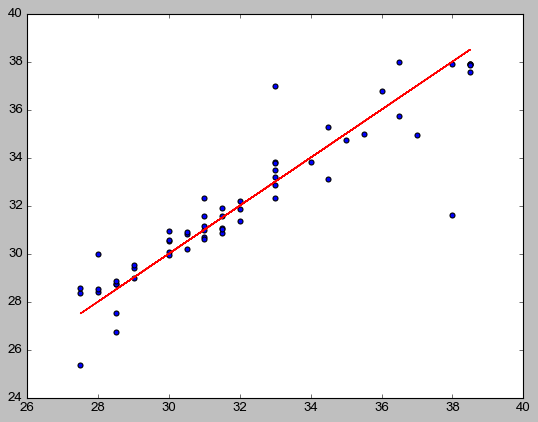

In [93]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [22]:
Efficiency = pd.DataFrame({"R^2": [86.54, 86.35, 85.87, 86.18],
                          "RMSE" : [1.2076, 1.22, 1.238, 1.2238]})

In [23]:
Efficiency.index = ["Linear Regression", "Random Forest", "Gradient Boosting", "ANN"]
Efficiency.head()

,R^2,RMSE
Linear Regression,86.54,1.2076
Random Forest,86.35,1.2200
Gradient Boosting,85.87,1.2380
ANN,86.18,1.2238


In [24]:
Efficiency.to_excel("efficiency.xlsx")

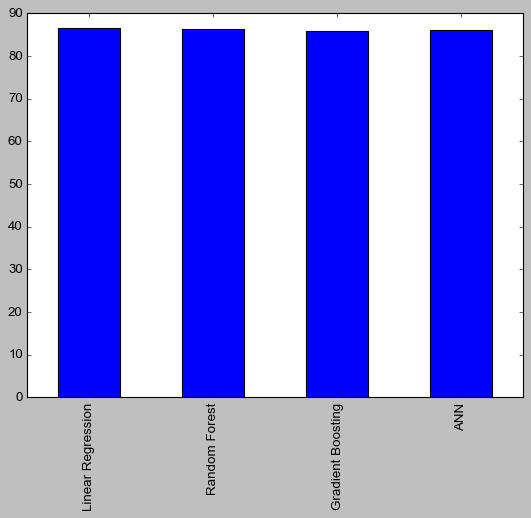

In [247]:
Efficiency["R^2"].plot(kind = "bar")

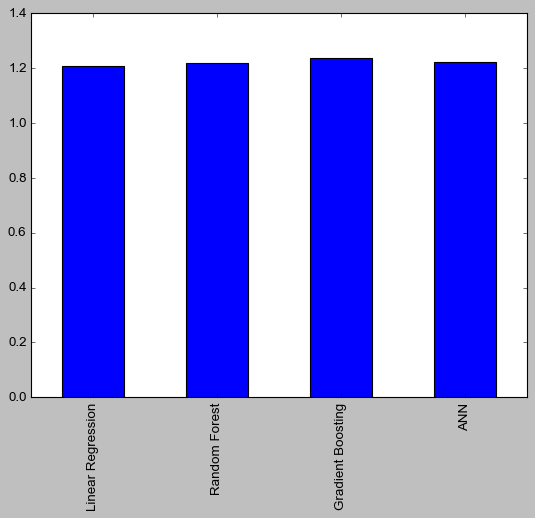

In [248]:
Efficiency["RMSE"].plot(kind = "bar")

In [106]:

ANOVA = pd.DataFrame({"Test Data_y": y_test,
                      "Linear Regression": y_pred, 
                      "Random Forest": y_pred_rf, 
                      "Gradient Boosting": y_pred_gb})

In [109]:
predictions = np.concatenate(predictions)

In [111]:
ANOVA = pd.DataFrame({"Test Data_y": y_test,
                      "Linear Regression": y_pred, 
                      "Random Forest": y_pred_rf, 
                      "Gradient Boosting": y_pred_gb,
                     "ANN": predictions})
ANOVA

,Test Data_y,Linear Regression,Random Forest,Gradient Boosting,ANN
0,34.5,33.121972,33.094202,32.534360,33.123756
1,31.0,31.282746,31.716181,31.498123,30.979561
2,36.5,35.559106,36.909011,37.045558,35.746750
3,28.5,28.851931,29.068889,28.957736,28.711899
4,31.0,31.492160,31.989890,32.106073,31.553474
5,33.0,33.726200,34.076581,34.985504,33.829178
6,27.5,28.439423,28.142548,27.843666,28.346132
7,31.0,32.098916,32.264657,31.647781,32.298412
8,38.0,37.800729,38.260642,38.363277,37.883602
9,29.0,29.053762,28.895234,28.268056,28.975079


In [112]:
ANOVA.to_excel("ANOVA.xlsx")

In [29]:
new = pd.read_excel("test.xlsx", sheet_name= "Sheet1")
new.head()
new.columns = ["Depth", "N60", "Phi", "Wolff", "This_study"]

In [30]:
new["Nitish"] = 26.1261 + 0.3125 * new["N60"]

In [33]:
new["err_This_study"] = abs(new["Phi"] - new["This_study"])
new["err_Wolff"] = abs(new["Phi"] - new["Wolff"])
new["err_Nitish"] = abs(new["Phi"] - new["Nitish"])
new.sort_values(by = ["Phi"], inplace = True)
new.reset_index(inplace = True)

In [34]:
new.head()

,index,Depth,N60,Phi,Wolff,This_study,Nitish,err_This_study,err_Wolff,err_Nitish
0,55,1.5,1.2,27.5,27.459222,27.93976,26.5011,0.43976,0.040778,0.9989
1,54,6.0,3.0,27.5,27.995140,28.62970,27.0636,1.12970,0.495140,0.4364
2,25,9.0,2.4,28.0,27.816890,28.51762,26.8761,0.51762,0.183110,1.1239
3,15,13.5,3.6,28.5,28.173002,29.01688,27.2511,0.51688,0.326998,1.2489
4,36,4.5,4.2,28.5,28.350474,28.97176,27.4386,0.47176,0.149526,1.0614


In [35]:
r2_score(new["Phi"], new["Wolff"])

0.7395797829085259

In [36]:
r2_score(new["Phi"], new["This_study"])

0.9096113582900339

In [37]:
r2_score(new["Phi"], new["Nitish"])

0.5929253643014616

In [38]:
(MSE(new["Phi"], new["Wolff"]))**0.5

1.7678742202540563

In [39]:
(MSE(new["Phi"], new["This_study"]))**0.5

1.0415279875292738

In [40]:
(MSE(new["Phi"], new["Nitish"]))**0.5

2.2102990446497635

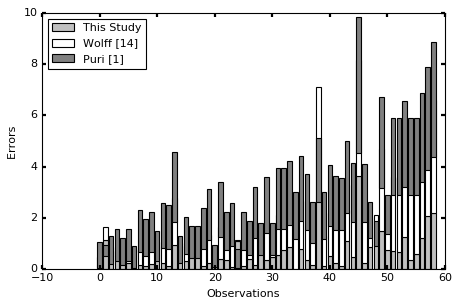

In [42]:

fig, ax = plt.subplots()
fig.set_size_inches(6.5,4)

p1 = plt.bar(new.index, new["err_This_study"], label = "This Study", color = "silver")
p2 = plt.bar(new.index, new["err_Wolff"],bottom = new["err_This_study"], label = "Wolff [14]", color = "white")
p2 = plt.bar(new.index,  new["err_Nitish"],bottom = new["err_Wolff"], label = "Puri [1]", color = "grey")
ax.set(ylabel = "Errors ", xlabel = "Observations")
fig.patch.set_facecolor("White")
mpl.rc('xtick', labelsize=10)     
mpl.rc('ytick', labelsize=10)
ax.tick_params(length = 4, width = 2)
ax.legend(loc = 2, prop = {"size" : 10})
plt.rcParams.update({'font.size': 10})
mpl.rcParams['text.color'] = 'black'
plt.savefig("Error.jpg",dpi=600, Transperant = True)

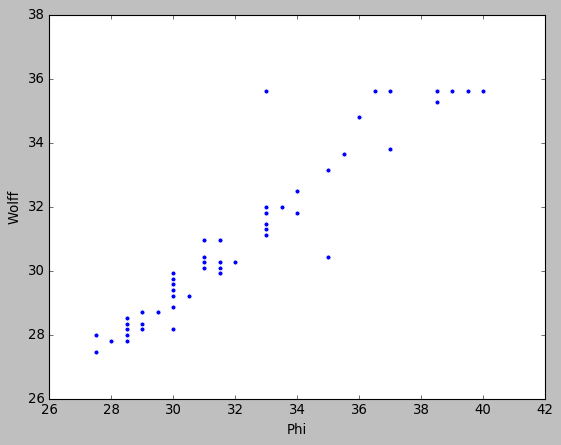

In [132]:
sns.scatterplot(new["Phi"], new["Wolff"])

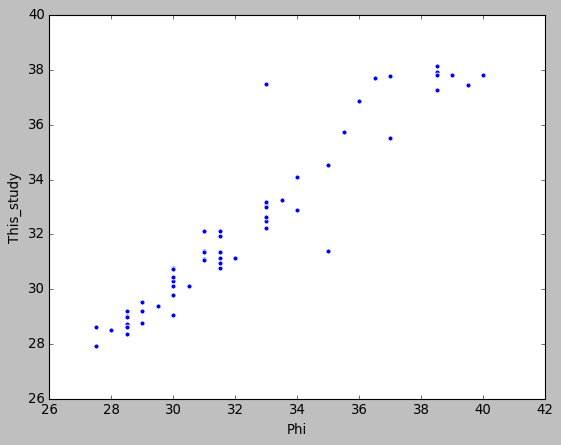

In [133]:
sns.scatterplot(new["Phi"], new["This_study"])

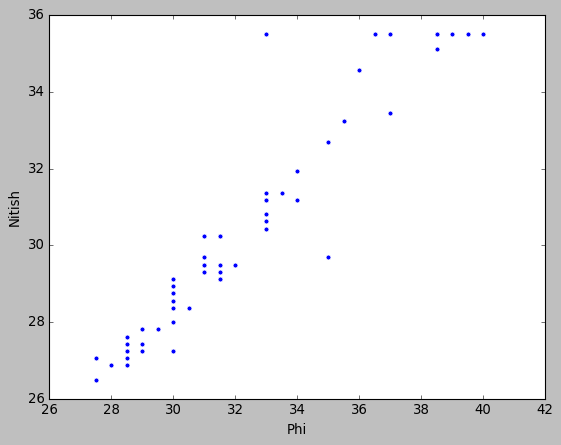

In [142]:
sns.scatterplot(new["Phi"], new["Nitish"])